<a href="https://colab.research.google.com/github/SalwaMustafa/DEPI-Tasks/blob/main/First_NLP_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP Lab Task — Preprocessing to Deployment with Twitter Sentiment Dataset

## Overview

This lab takes students through the **entire NLP pipeline** using a **Twitter Sentiment Analysis dataset** (tweets labeled as positive, negative, or neutral). Students will preprocess the data, represent it using multiple methods, train classical machine learning models, evaluate their results, and finally build a small API for deployment.

---

## Learning Objectives

* Apply text preprocessing (regex, case folding, tokenization, stopword removal, punctuation handling).
* Compare stemming and lemmatization, and use POS tagging to analyze counts of nouns, verbs, and adjectives.
* Build text representations using **Bag-of-Words**, **TF–IDF**, and **Word2Vec**.
* Train classical ML models inside an sklearn **Pipeline**.
* Evaluate models with standard metrics and perform basic error analysis.
* Save a trained pipeline and build a simple API to serve predictions.

---

## Dataset

We will use the **Sentiment140 Twitter dataset** (1.6M tweets, labeled positive/negative). For simplicity, you can work with a smaller balanced subset (e.g., 10k–20k tweets). This dataset is widely used for sentiment analysis and contains real, noisy text with mentions, hashtags, and emoticons.

Dataset link: [Sentiment140](http://help.sentiment140.com/for-students/)

---

## Step-by-Step Tasks

### 1) Exploratory Data Analysis (EDA)

* Load dataset, show class distribution, tweet length histogram, and a few sample tweets.
* Deliverable: 3 plots (class balance, length histogram, top frequent tokens) + 5 example tweets.

### 2) Regex Cleaning

* Remove URLs, mentions (@user), hashtags, emojis (or replace with tokens), and extra whitespace.
* Show a before-and-after example for at least 3 tweets.

### 3) Case Folding & Tokenization

* Convert all text to lowercase.
* Tokenize tweets using NLTK or spaCy.
* Compare vocabulary size before and after cleaning.

### 4) Stopwords, Punctuation, and Numbers

* Remove stopwords (with NLTK list, customizable).
* Decide how to handle punctuation and numbers (remove or replace with `<NUM>`).
* Deliverable: short explanation of your choice.

### 5) Stemming vs Lemmatization

* Use PorterStemmer (stemming) and spaCy lemmatizer.
* Show 20 sample words with their stem vs lemma.
* Train quick models with both and compare results.

### 6) POS Tagging (extra features)

* Use spaCy to count nouns, verbs, and adjectives per tweet.
* Add these counts as additional numeric features.
* Compare model with vs without POS features.

### 7) Text Representation

* Implement three representations:
  1. **Bag-of-Words** (CountVectorizer)
  2. **TF–IDF** (TfidfVectorizer)
  3. **Word2Vec** (pretrained embeddings, averaged per tweet)
* Compare vocabulary sizes and representation dimensions.

### 8) Modeling with Pipelines

* Use sklearn Pipelines to connect preprocessing + vectorizer + classifier.
* Models to try:
  * Multinomial Naive Bayes (for BoW/TF–IDF)
  * Logistic Regression
  * Linear SVM
* Deliverable: comparison table (accuracy, F1-score).

### 9) Evaluation & Error Analysis

* Use held-out test set.
* Metrics: accuracy, precision, recall, F1, confusion matrix.
* Show 10 misclassified tweets and discuss why they may be difficult.

### 10) Save Model Pipeline

* Save the best pipeline using `joblib` or `pickle`.
* Deliverable: `sentiment_model.pkl` file.

### 11) Build a Simple API (Deployment Step)

* Create a small Flask API with one endpoint `/predict` that accepts a tweet as input and returns sentiment prediction.
* The API should load the saved pipeline and make predictions.
* Deliverable: `app.py` with Flask code + test with a sample curl or Postman request.

---

## Deliverables

1. Jupyter Notebook with step-by-step tasks, results, and code.
2. Comparison tables for preprocessing choices and representations.
3. Saved pipeline file (`.pkl`).
4. Flask API script (`app.py`).
5. Short report in markdown cell summarizing preprocessing, modeling choices, and results.

---

This streamlined lab ensures students get hands-on experience with **real-world text preprocessing, classical modeling, and deployment of NLP systems**.


### 1. Load the Dataset

We will use the **Sentiment140 Twitter Sentiment dataset**.  
It contains 1.6 million tweets labeled as positive (4) or negative (0).  
For this lab, we will load a smaller subset (e.g., 20,000 rows) for faster experimentation.

```python
import pandas as pd

# Column order for Sentiment140 dataset:
# 0 - target (0 = negative, 4 = positive)
# 1 - ids
# 2 - date
# 3 - flag
# 4 - user
# 5 - text (tweet)

# Update the file path if needed
file_path = "sentiment140.csv"

# Load with proper encoding
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# Assign column names
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map target labels: 0 → negative, 4 → positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Take a smaller sample for experiments (optional)
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Quick check
print(df.shape)
df.head()


In [33]:
import pandas as pd
import zipfile
import os
import requests

# Step 1: Download the dataset (if not already downloaded)
url = "https://cs.stanford.edu/people/alecmgo/trainingandtestdata.zip"
zip_path = "trainingandtestdata.zip"

if not os.path.exists(zip_path):
    print("Downloading dataset...")
    r = requests.get(url)
    with open(zip_path, "wb") as f:
        f.write(r.content)

# Step 2: Unzip the file
with zipfile.ZipFile(zip_path, "r") as zip_ref:
    zip_ref.extractall(".")

# Step 3: Load training data
file_path = "training.1600000.processed.noemoticon.csv"

df = pd.read_csv(file_path, encoding="latin-1", header=None)
df.columns = ["target", "id", "date", "flag", "user", "text"]

# Map sentiment labels: 0 = negative, 4 = positive
df["target"] = df["target"].map({0: "negative", 4: "positive"})

# Optional: sample a smaller dataset for quicker experiments
df = df.sample(20000, random_state=42).reset_index(drop=True)

# Preview the data
print(df.shape)
df.head()


# Load training set
train_path = "training.1600000.processed.noemoticon.csv"
train_df = pd.read_csv(train_path, encoding="latin-1", header=None)
train_df.columns = ["target", "id", "date", "flag", "user", "text"]
train_df["target"] = train_df["target"].map({0: "negative", 4: "positive"})

print("Training set:", train_df.shape)
print(train_df.head())

# Load manual test set
test_path = "testdata.manual.2009.06.14.csv"
test_df = pd.read_csv(test_path, encoding="latin-1", header=None)
test_df.columns = ["target", "id", "date", "flag", "user", "text"]

# This test set has labels 0 (negative), 2 (neutral), 4 (positive)
test_df["target"] = test_df["target"].map({0: "negative", 2: "neutral", 4: "positive"})

print("Test set:", test_df.shape)
print(test_df.head())


(20000, 6)
Training set: (1600000, 6)
     target          id                          date      flag  \
0  negative  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1  negative  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2  negative  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3  negative  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4  negative  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   

              user                                               text  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I dived many times for the ball. Man...  
3          ElleCTF    my whole body feels itchy and like its on fire   
4           Karoli  @nationwideclass no, it's not behaving at all....  
Test set: (498, 6)
     target  id                          date     flag      user  \
0  positive   3  Mon May 11 03:17:40 UTC

In [34]:
df.head()

,target,id,date,flag,user,text
0,negative,2200003196,Tue Jun 16 18:18:12 PDT 2009,NO_QUERY,LaLaLindsey0609,@chrishasboobs AHHH I HOPE YOUR OK!!!
1,negative,1467998485,Mon Apr 06 23:11:14 PDT 2009,NO_QUERY,sexygrneyes,"@misstoriblack cool , i have no tweet apps fo..."
2,negative,2300048954,Tue Jun 23 13:40:11 PDT 2009,NO_QUERY,sammydearr,@TiannaChaos i know just family drama. its la...
3,negative,1993474027,Mon Jun 01 10:26:07 PDT 2009,NO_QUERY,Lamb_Leanne,School email won't open and I have geography ...
4,negative,2256550904,Sat Jun 20 12:56:51 PDT 2009,NO_QUERY,yogicerdito,upper airways problem


In [35]:
df['target'].value_counts()

,count
target,
positive,10058
negative,9942


In [36]:
df.shape

(20000, 6)

In [37]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


In [38]:
df.duplicated().sum()

0

/tmp/ipython-input-4260171924.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


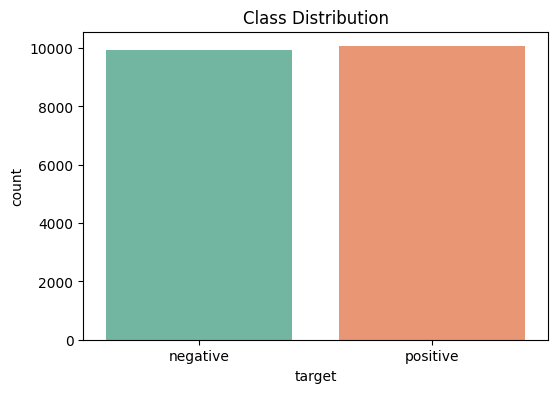

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Class Distribution")
plt.show()

In [40]:
df["text"].str.len()

,text
0,38
1,57
2,137
3,91
4,22
...,...
19995,103
19996,66
19997,53
19998,41


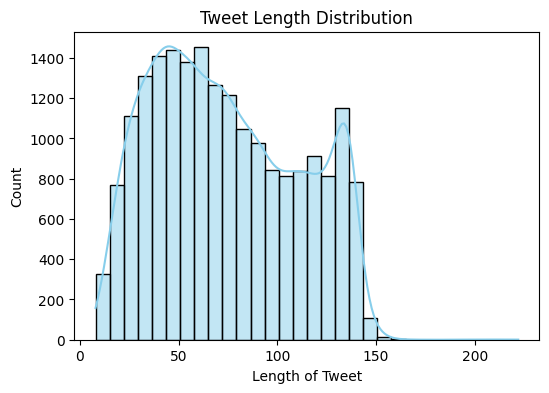

In [41]:
plt.figure(figsize=(6,4))
sns.histplot(df["text"].str.len(), bins=30, kde=True, color="skyblue")
plt.title("Tweet Length Distribution")
plt.xlabel("Length of Tweet")
plt.ylabel("Count")
plt.show()

/tmp/ipython-input-1551190115.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="mako")


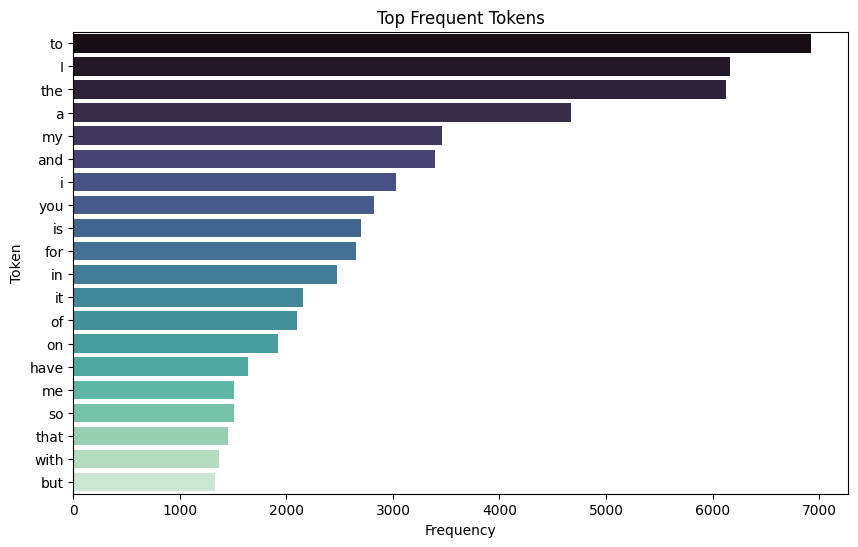

In [42]:
from collections import Counter


all_words = " ".join(df["text"]).split()
word_counts = Counter(all_words)

top_words = word_counts.most_common(20)

words, counts = zip(*top_words)

plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(words), palette="mako")
plt.title("Top Frequent Tokens")
plt.xlabel("Frequency")
plt.ylabel("Token")
plt.show()


**They are all considered stop words**

In [43]:
import re

def clean_tweet(text):
    text = re.sub(r"http\S+|www\S+", " ", text)   # remove URLs
    text = re.sub(r"\s*@\w+", " ", text)          # remove mentions
    text = re.sub(r"\s*#\w+", " ", text)          # remove hashtags
    text = re.sub(r"[^\w\s]", " ", text)          # remove punctuation/emojis
    text = " ".join(text.split())                 # normalize spaces
    return text

print("Before Cleaning:")
print(df["text"].head(3))

print("-"*60)

print("After Cleaning:")
print(df["text"].head(3).apply(clean_tweet))



Before Cleaning:
0               @chrishasboobs AHHH I HOPE YOUR OK!!! 
1    @misstoriblack cool , i have no tweet apps  fo...
2    @TiannaChaos i know  just family drama. its la...
Name: text, dtype: object
------------------------------------------------------------
After Cleaning:
0                                  AHHH I HOPE YOUR OK
1              cool i have no tweet apps for my razr 2
2    i know just family drama its lame hey next tim...
Name: text, dtype: object


In [44]:
import spacy
nlp = spacy.load("en_core_web_sm")



def spacy_tokenizer(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_space]

In [45]:
df["tokens_before"] = df["text"].apply(spacy_tokenizer)


df["clean_text"] = df["text"].apply(clean_tweet).str.lower()
df["tokens_after"] = df["clean_text"].apply(spacy_tokenizer)


vocab_before = set([tok for tokens in df["tokens_before"] for tok in tokens])
vocab_after = set([tok for tokens in df["tokens_after"] for tok in tokens])

print("Vocabulary size before cleaning:", len(vocab_before))
print("Vocabulary size after cleaning :", len(vocab_after))


print("Example tokens")
for i in range(3):
    print(f"Tweet {i+1}:")
    print("Before:", df['tokens_before'].iloc[i])
    print("After :", df['tokens_after'].iloc[i])
    print("-"*50)


Vocabulary size before cleaning: 37476
Vocabulary size after cleaning : 20579
Example tokens
Tweet 1:
Before: ['@chrishasboobs', 'AHHH', 'I', 'HOPE', 'YOUR', 'OK', '!', '!', '!']
After : ['ahhh', 'i', 'hope', 'your', 'ok']
--------------------------------------------------
Tweet 2:
Before: ['@misstoriblack', 'cool', ',', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
After : ['cool', 'i', 'have', 'no', 'tweet', 'apps', 'for', 'my', 'razr', '2']
--------------------------------------------------
Tweet 3:
Before: ['@TiannaChaos', 'i', 'know', 'just', 'family', 'drama', '.', 'its', 'lame.hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', ',', 'ill', 'call', 'u']
After : ['i', 'know', 'just', 'family', 'drama', 'its', 'lame', 'hey', 'next', 'time', 'u', 'hang', 'out', 'with', 'kim', 'n', 'u', 'guys', 'like', 'have', 'a', 'sleepover', 'or', 'whatever', 'ill', 'call', 'u']
-----------------------------

In [46]:
!pip install pyspellchecker

In [47]:
import nltk
from nltk.corpus import stopwords, words


nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('words')
stop_words = set(stopwords.words('english'))


negations_en = {
    "no", "not", "nor", "never", "neither", "none", "nobody", "nothing", "nowhere",
    "cannot", "can't", "dont", "don't", "doesnt", "doesn't", "didnt", "didn't",
    "isnt", "isn't", "wasnt", "wasn't", "werent", "weren't",
    "havent", "haven't", "hasnt", "hasn't", "hadnt", "hadn't",
    "won't", "wouldnt", "wouldn't", "shouldnt", "shouldn't", "mustnt", "mustn't",
    "aint","ain't", "aren't","couldn't",'didn','aren','hadn', 'hasn','haven', 'isn',
    'mightn', "mightn't",'mustn', 'needn',"needn't", 'can','didn', 'doesn','wouldn',
    'shouldn','isn', 'weren', 'wasn'
}



stop_words = stop_words - negations_en

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [48]:
list(stop_words)[:20]

['into',
 'of',
 'such',
 'ourselves',
 'she',
 'themselves',
 'before',
 'his',
 'them',
 'are',
 'under',
 'yourself',
 "should've",
 'when',
 "you're",
 'couldn',
 "she'll",
 'him',
 'having',
 'as']

In [49]:
import string


def preprocess_tokens(tokens):
    clean_tokens = []
    for tok in tokens:

        if tok in stop_words:
            continue

        if tok.isdigit():
            clean_tokens.append("<NUM>")
            continue

        if tok in string.punctuation:
            continue
        clean_tokens.append(tok)
    return clean_tokens


df["final_tokens"] = df["tokens_after"].apply(preprocess_tokens)

print("Example:")
print("Before:", df["tokens_after"].iloc[0])
print("After :", df["final_tokens"].iloc[0])


Example:
Before: ['ahhh', 'i', 'hope', 'your', 'ok']
After : ['ahhh', 'hope', 'ok']


**Explanation:**

In pipeline, I decided not to completely remove numbers. While numbers themselves do not directly carry sentiment like iphone 15, they can still provide important contextual cues that influence the polarity of a tweet.

For example:

“I waited 3 hours” → negative sentiment.

“I got 100% on my test” → positive sentiment.

“The movie was 2/10” → negative sentiment.

If we simply removed all numbers, this information would be lost. On the other hand, keeping raw numbers would unnecessarily increase vocabulary size.

The best compromise is to replace all numbers with a special token **< NUM >**. This way, the model can still learn that the presence of a number may affect sentiment, without overfitting to specific numeric values.

In [50]:
import spacy
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")
stemmer = PorterStemmer()

sample_words = [
    "running", "flies", "better", "happiest", "studies",
    "easily", "bigger", "playing", "connected", "cars",
    "went", "doing", "geese", "fishing", "argued",
    "drove", "wolves", "children", "meeting", "hopes"
]

print(f"{'Wo rd':<12}{'Stemming':<12}{'Lemmatization'}")
print("-"*40)
for word in sample_words:
    stem = stemmer.stem(word)
    lemma = nlp(word)[0].lemma_
    print(f"{word:<12}{stem:<12}{lemma}")


Wo rd       Stemming    Lemmatization
----------------------------------------
running     run         run
flies       fli         fly
better      better      well
happiest    happiest    happy
studies     studi       study
easily      easili      easily
bigger      bigger      big
playing     play        play
connected   connect     connect
cars        car         car
went        went        go
doing       do          do
geese       gees        geese
fishing     fish        fishing
argued      argu        argue
drove       drove       drive
wolves      wolv        wolf
children    children    child
meeting     meet        meeting
hopes       hope        hope


In [51]:
df = df[df["final_tokens"].apply(len) > 0]
df["final_text"] = df["final_tokens"].apply(lambda tokens: " ".join(tokens))

In [52]:
df["target"].head()

,target
0,negative
1,negative
2,negative
3,negative
4,negative


In [53]:
df["target"] = df["target"].map({"negative":0, "positive":1})

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


def stem_tokens(tokens):
    return [stemmer.stem(t) for t in tokens]


y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(
    df["final_text"], y, test_size=0.2, random_state=42
)

vectorizer_stem = CountVectorizer(tokenizer=stem_tokens)
X_train_vec = vectorizer_stem.fit_transform(X_train)
X_test_vec = vectorizer_stem.transform(X_test)


model_stem = LogisticRegression(max_iter=1000)
model_stem.fit(X_train_vec, y_train)


y_pred = model_stem.predict(X_test_vec)
acc_stem = accuracy_score(y_test, y_pred)

print("Accuracy with Stemming:", acc_stem)
print(classification_report(y_test, y_pred))



/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy with Stemming: 0.5675539929683576
              precision    recall  f1-score   support

           0       0.57      0.52      0.54      1968
           1       0.57      0.61      0.59      2014

    accuracy                           0.57      3982
   macro avg       0.57      0.57      0.57      3982
weighted avg       0.57      0.57      0.57      3982



In [55]:
def lemma_tokens(tokens):
    return [token.lemma_ for token in nlp(" ".join(tokens))]



X_train, X_test, y_train, y_test = train_test_split(
    df["final_text"], y, test_size=0.2, random_state=42
)


vectorizer_lemma = CountVectorizer(tokenizer=lemma_tokens)
X_train_vec = vectorizer_lemma.fit_transform(X_train)
X_test_vec = vectorizer_lemma.transform(X_test)


model_lemma = LogisticRegression(max_iter=1000)
model_lemma.fit(X_train_vec, y_train)


y_pred = model_lemma.predict(X_test_vec)
acc_lemma = accuracy_score(y_test, y_pred)

print("Accuracy with Lemmatization:", acc_lemma)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Accuracy with Lemmatization: 0.5695630336514315
              precision    recall  f1-score   support

           0       0.57      0.52      0.55      1968
           1       0.57      0.61      0.59      2014

    accuracy                           0.57      3982
   macro avg       0.57      0.57      0.57      3982
weighted avg       0.57      0.57      0.57      3982



In [56]:
def pos_features(text):
    doc = nlp(text)
    nouns = sum(1 for token in doc if token.pos_ == "NOUN")
    verbs = sum(1 for token in doc if token.pos_ == "VERB")
    adjs  = sum(1 for token in doc if token.pos_ == "ADJ")
    return nouns, verbs, adjs

df[["nouns", "verbs", "adjs"]] = df["final_text"].apply(lambda x: pd.Series(pos_features(x)))

print(df[["final_text", "nouns", "verbs", "adjs"]].head())


                                          final_text  nouns  verbs  adjs
0                                       ahhh hope ok      1      0     0
1                      cool no tweet apps razr <NUM>      1      2     1
2  know family drama lame hey next time u hang ki...      7      2     3
3  school email open geography stuff revise stupi...      5      1     2
4                              upper airways problem      2      0     1


In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack


X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["final_text"], y, test_size=0.2, random_state=42
)

X_train_pos, X_test_pos = train_test_split(
    df[["nouns", "verbs", "adjs"]].values, test_size=0.2, random_state=42
)


vectorizer = TfidfVectorizer(max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train_text)
X_test_vec = vectorizer.transform(X_test_text)


X_train = hstack([X_train_vec, X_train_pos])
X_test = hstack([X_test_vec, X_test_pos])


model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1968
           1       0.75      0.77      0.76      2014

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted avg       0.75      0.75      0.75      3982



**These linguistic features were added as extra numeric features alongside the TF-IDF representation of the text.**

In [58]:
#!pip install --upgrade --force-reinstall numpy gensim

In [59]:
import numpy as np
import gensim.downloader as api


w2v = api.load("glove-twitter-100")



def tweet_vector(tokens, model, vector_size=100):
    vecs = []
    for token in tokens:
        if token in model:
            vecs.append(model[token])
    if len(vecs) == 0:
        return np.zeros(vector_size)
    else:
        return np.mean(vecs, axis=0)


X_w2v = np.array([tweet_vector(tokens, w2v) for tokens in df["final_tokens"]])

print("Word2Vec shape:", X_w2v.shape)


Word2Vec shape: (19907, 100)


In [60]:
X_train_text, X_test_text, y_train, y_test = train_test_split(
    df["final_text"], y, test_size=0.2, random_state=42
)

count_vec = CountVectorizer()
X_train_bow = count_vec.fit_transform(X_train_text)
X_test_bow = count_vec.transform(X_test_text)

tfidf_vec = TfidfVectorizer()
X_train_tfidf = tfidf_vec.fit_transform(X_train_text)
X_test_tfidf = tfidf_vec.transform(X_test_text)

print("BOW:", X_train_bow.shape, "Vocab size:", len(count_vec.get_feature_names_out()))
print("TF-IDF:", X_train_tfidf.shape, "Vocab size:", len(tfidf_vec.get_feature_names_out()))
print("Word2Vec:", X_w2v.shape, "Fixed dim: 100")


BOW: (15925, 17645) Vocab size: 17645
TF-IDF: (15925, 17645) Vocab size: 17645
Word2Vec: (19907, 100) Fixed dim: 100


**Bag-of-Words and TF–IDF representations both depend on the vocabulary extracted from the dataset, leading to very high-dimensional and sparse matrices. In contrast, Word2Vec produces dense embeddings of fixed dimension, independent of vocabulary size. This allows Word2Vec to capture semantic relationships between words and reduce dimensionality.**

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC


X_train, X_test, y_train, y_test = train_test_split(
    df["final_text"], y, test_size=0.2, random_state=42
)


pipelines = {
    "BOW + Naive Bayes": Pipeline([
        ("vect", CountVectorizer()),
        ("clf", MultinomialNB())
    ]),
    "TF-IDF + Naive Bayes": Pipeline([
        ("vect", TfidfVectorizer()),
        ("clf", MultinomialNB())
    ]),
    "BOW + Logistic Regression": Pipeline([
        ("vect", CountVectorizer()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "TF-IDF + Logistic Regression": Pipeline([
        ("vect", TfidfVectorizer()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "BOW + Linear SVM": Pipeline([
        ("vect", CountVectorizer()),
        ("clf", LinearSVC())
    ]),
    "TF-IDF + Linear SVM": Pipeline([
        ("vect", TfidfVectorizer()),
        ("clf", LinearSVC())
    ]),
}


for name, pipe in pipelines.items():
    print("="*60)
    print(name)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(classification_report(y_test, y_pred))


BOW + Naive Bayes
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1968
           1       0.76      0.72      0.74      2014

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982

TF-IDF + Naive Bayes
              precision    recall  f1-score   support

           0       0.73      0.76      0.74      1968
           1       0.75      0.72      0.74      2014

    accuracy                           0.74      3982
   macro avg       0.74      0.74      0.74      3982
weighted avg       0.74      0.74      0.74      3982

BOW + Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.72      0.74      1968
           1       0.74      0.77      0.75      2014

    accuracy                           0.75      3982
   macro avg       0.75      0.75      0.75      3982
weighted 

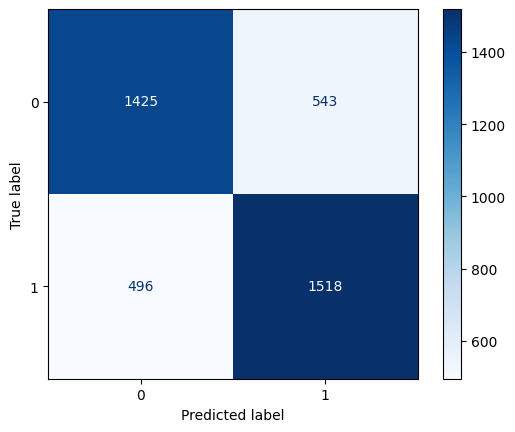

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap="Blues")
plt.show()


In [63]:
misclassified = X_test[y_test != y_pred][:10]


for text, true, pred in zip(misclassified, y_test[y_test != y_pred][:10], y_pred[y_test != y_pred][:10]):
    print(f"Tweet: {text}")
    print(f"True: {true}, Predicted: {pred}")
    print("-"*50)


Tweet: handphone oh god
True: 0, Predicted: 1
--------------------------------------------------
Tweet: day today bday starting <NUM> <NUM> conference call erm yea
True: 0, Predicted: 1
--------------------------------------------------
Tweet: see directly behind halfway back section
True: 1, Predicted: 0
--------------------------------------------------
Tweet: missing hamptons hug followed cameras cuz superstar
True: 1, Predicted: 0
--------------------------------------------------
Tweet: dayum like able see going blind sex cut
True: 1, Predicted: 0
--------------------------------------------------
Tweet: ca nt sleep weirdest nightmares life got lights said prayers guess not sleeping anytime soon
True: 1, Predicted: 0
--------------------------------------------------
Tweet: interview front camera tomorrow good side
True: 0, Predicted: 1
--------------------------------------------------
Tweet: downloaded tweetdeck know use confusing
True: 0, Predicted: 1
--------------------------

In [65]:
import joblib


final_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000, random_state=42))
])


final_pipeline.fit(X_train, y_train)
print("Test Accuracy:", final_pipeline.score(X_test, y_test))

joblib.dump(final_pipeline, "sentiment_model.pkl")
print("Model saved as sentiment_model.pkl")


Test Accuracy: 0.7561526870919136
Model saved as sentiment_model.pkl
